## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Version of Python
Python 3.6.6 :: Anaconda custom (64-bit)<br>
pandas  0.23.3  py36h6440ff4_0 

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [24]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k * 100 / n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Text(0.5,0,'Occupation')

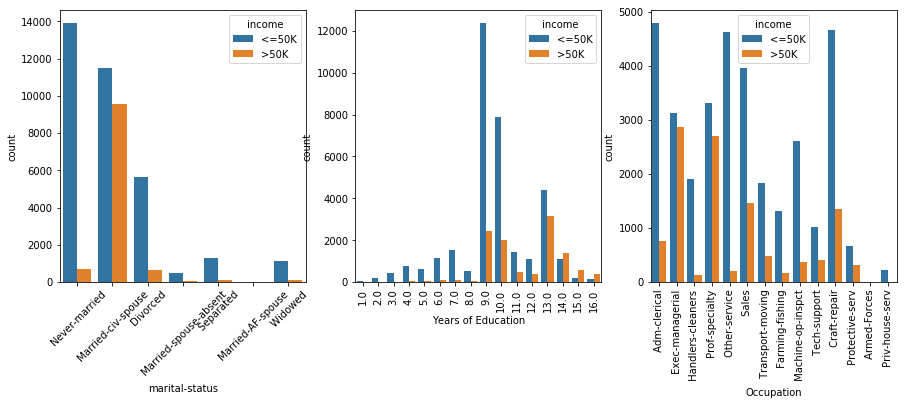

In [21]:
# Some explorative analysis to guess which features will likely be important
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 3, 1)
# Suggests marital-status = 'married' 
sb.countplot(data = data, x = 'marital-status', hue = 'income')
plt.xticks(rotation=45)

# Education-num also important
plt.subplot(1, 3, 2)
sb.countplot(data = data, x = 'education-num', hue = 'income')
plt.xticks(rotation=90)
plt.xlabel('Years of Education')

#Occupation a bit uncocnlusive
plt.subplot(1, 3, 3)
sb.countplot(data = data, x = 'occupation', hue = 'income')
plt.xticks(rotation=90)
plt.xlabel('Occupation')

#data.groupby(['income','marital-status']).count()

# race not much, as whole dataset is skewed
#data['race'].value_counts()
#plt.subplot(1, 3, 3)
#sb.countplot(data = data, x = 'race', hue = 'income')
#plt.xticks(rotation=90)
#plt.xlabel('Race')


income
<=50K    39.372023
>50K     45.690489
Name: hours-per-week, dtype: float64


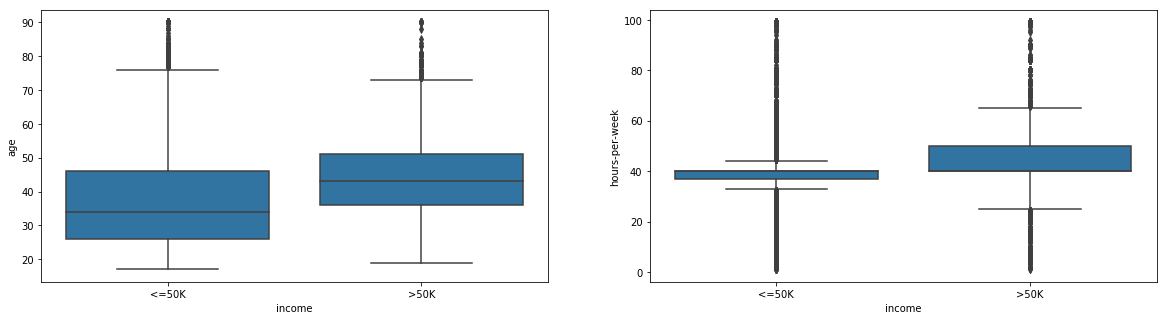

In [38]:
# Boxplots for age and hour-per-week distributions for the 2 income groups
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
# Age is important, the mean age among >50k is higher
plt.subplot(1, 2, 1)
sb.boxplot(data = data, x = 'income', y = 'age', color = base_color)
#plt.ylim(ax1.get_ylim())
print(data.groupby(['income'])['hours-per-week'].mean())
# Hours per week worked also relevant but not as much as age
plt.subplot(1, 2, 2)
sb.boxplot(data = data, x = 'income', y = 'hours-per-week', color = base_color)


Mean Capital Gains among income <50k is 149.02 while among ones > 50k is 3991.79
Mean Capital Losses among income <50k is 54.03 while among ones > 50k is 193.49


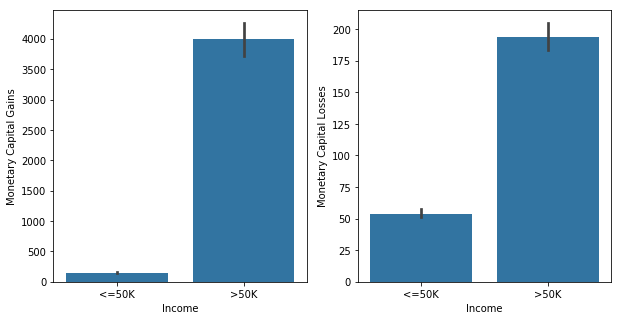

In [5]:
# Capital gains and losses, shows the >50k group has higher Gains and Losses

base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
sb.barplot(data = data, x = 'income', y = 'capital-gain', color = base_color)
plt.xlabel('Income')
plt.ylabel('Monetary Capital Gains')
plt.subplot(1, 2, 2)
sb.barplot(data = data, x = 'income', y = 'capital-loss', color = base_color)
plt.xlabel('Income')
plt.ylabel('Monetary Capital Losses')

capgain_mean = data.groupby(['income'])['capital-gain'].mean()
caploss_mean = data.groupby(['income'])['capital-loss'].mean()
print("Mean Capital Gains among income <50k is {0:4.2f} while among ones > 50k is {1:4.2f}".format(capgain_mean[0], capgain_mean[1]))
print("Mean Capital Losses among income <50k is {0:4.2f} while among ones > 50k is {1:4.2f}".format(caploss_mean[0], caploss_mean[1]))

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

/Users/maurizio/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


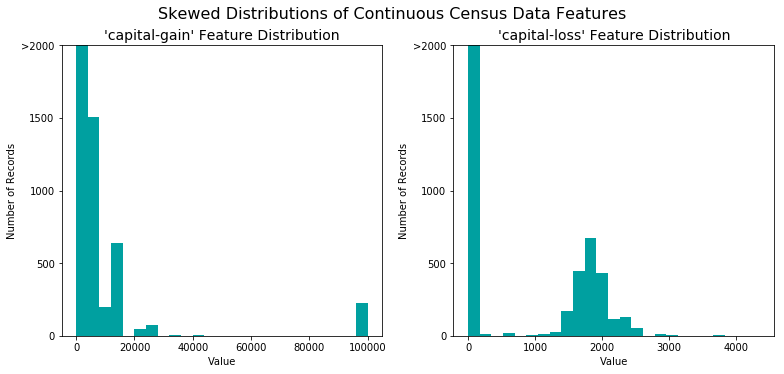

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

/Users/maurizio/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


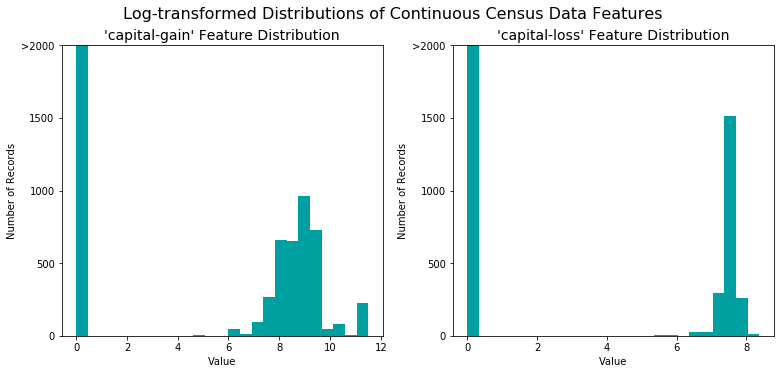

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [9]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.replace({'<=50K': 0, '>50K': 1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [10]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [32]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
                    # encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP / (TP + FP)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5**2) * (precision * recall)/((0.5**2 * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

# **Answer: **
## Model 1: Logistic Regression
### Describe one real-world application in industry where the model can be applied.
Finance: Loans Approvals: Does this client qualify for the load he applied for? A financial institution can train a Logistic Regression classifier with historical data from his loan department and use it automate decisions on approval/rejection of loan applications.<br>
### What are the strengths of the model; when does it perform well?
It is known to perform well as long as data are linearly separable.
It is also pretty robust to noise and you can avoid overfitting by using L2 or L1 regularization.
A final advantage of LR is that the output can be interpreted as a probability (therefore allowing to rank the outputs)<br>
### What are the weaknesses of the model; when does it perform poorly?
Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. They are not flexible enough to naturally capture more complex relationships.<br>
### What makes this model a good candidate for the problem, given what you know about the data?
Logistic regression is a good classification algorithm that can be trained as long as we expect your features to be roughly linear and the problem to be linearly separable. I prefer is to Naive Bayes for this purpose as I noticed from the data exploration that some feature are probably not linearly independent (for example education-level/education num or marital status/relationships), which is a base assumption for Naive Bayes. At this point we don't know if the problem is linearly separable, therefore I want to use this simple algorithm as a base to compare more sophisticated algoriths with.<br>
References: 
https://www.quora.com/What-are-applications-of-linear-and-logistic-regression<br>
https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms
<br>
## Model 2: Decision Trees<br>
### Real World Application: Fraud detection<br>
Spotting potential cases of fraud across many different fields. PayPal, for example, is using machine learning to fight money laundering. The company has tools that compare millions of transactions and can precisely distinguish between legitimate and fraudulent transactions between buyers and sellers.<br>
Reference: https://medium.com/@ailabs/5-machine-learning-algorithms-and-their-proper-use-cases-a8cfd0cedb51 <br>
### Strengths:
-  Simple to understand and to interpret. Trees can be visualised.<br>
-  The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.<br>
-  Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.<br>
-  Able to handle multi-output problems.<br>
-  Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.<br>
-  Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.<br>
-  Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

### Weaknesses:
-  Decision-tree learners can create over-complex trees that do not generalise the data well (overfitting). Mechanisms such setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.<br>
-  Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.<br>
-  The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement<br>
-  Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.<br>
Reference:  http://scikit-learn.org/stable/modules/tree.html<br>


### What makes this model a good candidate for the problem, given what you know about the data?
Given the dimensionality of the features space (103 features) and the number of training examples I need a more sophisticated algorithm than Logistic Regression to find the best accuracy on the training dataset, and I am prepared to use mechanisms to solve overfitting should it occur.<br>
## Model 3: Ensemble methods (AdaBoost)
### Real-World Application: One vs All Recognition
One versus all recognition encompasses several different problems. One of them is anomaly detection, which is the problem of detecting unusual patterns, i.e., what does not fit into the set of identified patterns. The opposite problem is target recognition—finding what fits into an identified pattern. Intrusion detection is a problem that could be solved both ways—look for one of a set of known types of attacks (target recognition) or look for anomalies in the usage patterns (anomaly detection). Ensemble methods are well-suited to solving one vs. all recognition problems. In target detection problems, one can easily envision having one model per possible target and running all the models in parallel and observing if one model fires or gives a stronger indication of recognition than the others. If two or more models fire at nearly equal strength, then other steps may need to be taken to disambiguate among the possible target types. In anomaly detection, an ensemble may consist of models designed to detect anomalies under different situations.
References: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.133.6529&rep=rep1&type=pdf
### Strengths
-  One main advantage is that they do not expect linear features or even features that interact linearly. 
-  Because of how they are constructed (using bagging or boosting) these algorithms handle very well high dimensional spaces as well as large number of training examples.
-  Adaboost is designed to avoid overfitting
- They are robust to outliers and  scalable

### Weaknesses
- It's more computationally expensive and slow compared to the algorithms above
-  AdaBoost can be sensitive to noisy data and outliers
-  Must be modified for multiclass problems
References: http://www.cs.man.ac.uk/~nikolaon/~nikolaon_files/Introduction_to_AdaBoost.pdf

### What makes this model a good candidate for the problem, given what you know about the data?
Ensemble methods combine algorithms, and therefore perform better by meeting in the middle in terms of bias and variance.  Also by introducing randomness I am hoping to avoid the typical overfitting probklems of high variance algorithms like Decision Trees. I also considered using SVM as a third method but I ruled it out because it becomes too slow given the size of the training dataset.




### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [33]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


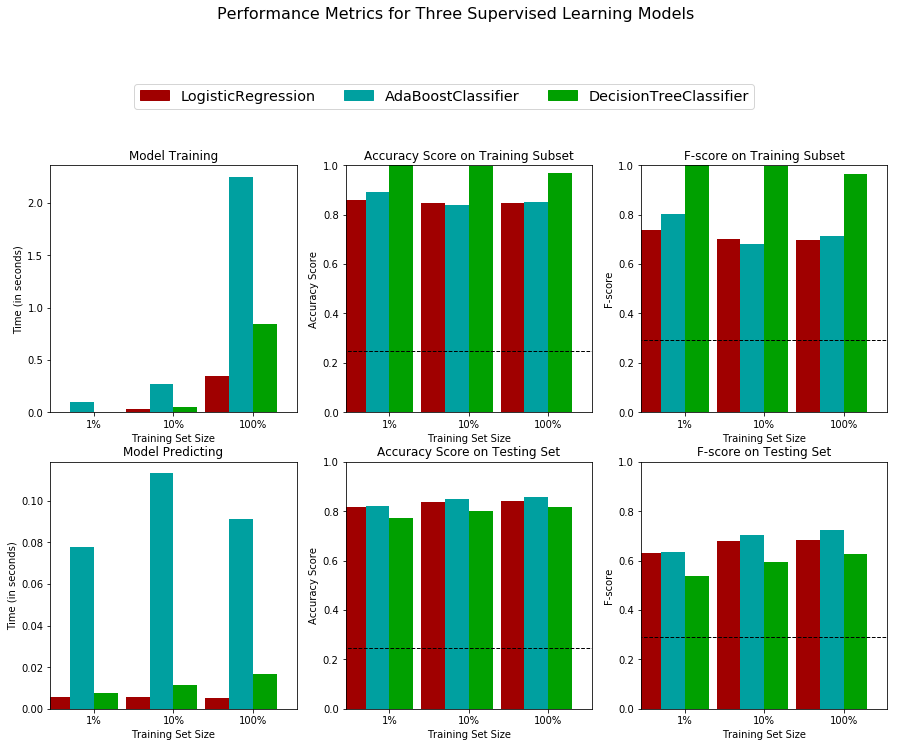

LogisticRegression trained in 0.3468618392944336 seconds
LogisticRegression Accuracy Training 0.8466666666666667
LogisticRegression Accuracy Testing 0.841901603095633
LogisticRegression Fbeta Training 0.6985294117647058
LogisticRegression Fbeta Test 0.6831652282416554

AdaBoostClassifier trained in 2.248721122741699 seconds
AdaBoostClassifier Accuracy Training 0.85
AdaBoostClassifier Accuracy Testing 0.8576008844665561
AdaBoostClassifier Fbeta Training 0.7115384615384616
AdaBoostClassifier Fbeta Test 0.7245508982035928

DecisionTreeClassifier trained in 0.8409698009490967 seconds
DecisionTreeClassifier Accuracy Training 0.97
DecisionTreeClassifier Accuracy Testing 0.8185737976782753
DecisionTreeClassifier Fbeta Training 0.9638554216867471
DecisionTreeClassifier Fbeta Test 0.627939142461964



In [88]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = LogisticRegression()

clf_B = AdaBoostClassifier(random_state=0)

clf_C = DecisionTreeClassifier(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = len(y_train) // 10
samples_1 = len(y_train) // 100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print(clf_name + " trained in {} seconds".format(results[clf_name][2]['train_time']))
    print(clf_name + " Accuracy Training {}".format(results[clf_name][2]['acc_train']))
    print(clf_name + " Accuracy Testing {}".format(results[clf_name][2]['acc_test']))
    print(clf_name + " Fbeta Training {}".format(results[clf_name][2]['f_train']))
    print(clf_name + " Fbeta Test {}\n".format(results[clf_name][2]['f_test']))
    

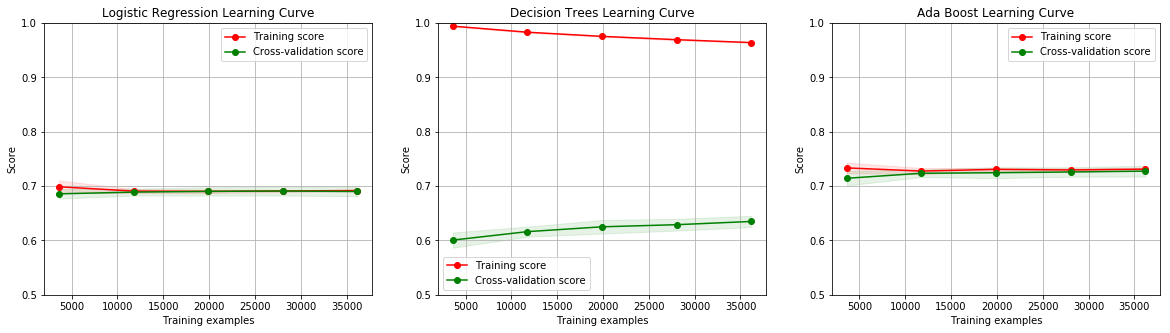

In [19]:
# Learning Curves, to have a look at Bias/Variance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from plot_learning_curve import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import fbeta_score, make_scorer

f_point5_scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Initialize the three models
clf_A = LogisticRegression()
clf_B = AdaBoostClassifier(random_state=0)
clf_C = DecisionTreeClassifier(random_state=0)

X = features_final
y = income
plt.figure(figsize = [20, 5])
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.subplot(1, 3, 1)
plot_learning_curve(clf_A, 'Logistic Regression Learning Curve', X, y, scorer=f_point5_scorer, cv=cv, ylim=(0.5, 1), n_jobs=2)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.subplot(1, 3, 2)
plot_learning_curve(clf_C, 'Decision Trees Learning Curve', X, y, scorer=f_point5_scorer, cv=cv, ylim=(0.5, 1), n_jobs=2)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.subplot(1, 3, 3)
plot_learning_curve(clf_B, 'Ada Boost Learning Curve', X, y, scorer=f_point5_scorer, cv=cv, ylim=(0.5, 1), n_jobs=2)

plt.show()

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

Considering the metrics on the test set after training the algorithms on 100% of training examples, Adaboost gives me te best accuracy and Fbeta score than Logistic Regression and Decision Trees. In particular I get: <br>
-  AdaBoostClassifier Accuracy Testing 0.8576008844665561<br>
-  AdaBoostClassifier Fbeta Test 0.7245508982035928<br>
On the training  set (100 % of the training examples) we get:<br> 
-  AdaBoostClassifier Accuracy Training 0.85 <br>
-  AdaBoostClassifier Fbeta Training 0.7115384615384616 <br

Therefore the small gap between the two gives us confidence that the model is not overfitting the data<br>
As expected the gap is much bigger for the Decision Trees confirming that this algorithm tends to overfit the data.
Adaboost is way slower than the other two models both in training and prediction in particular:
-  training time is 2secs compared to 0.75 of Decision Trees and 0.3 secs of Logistic Regression
-  Prediction time is 0.08 secs compared to 0.01 secs of Decision Trees while Logistic regression is even faster

Adaboost fits well in a high dimensional space like this one (> 100 features), where we do not expect the data to be linearly separable. Also considering the number of training examples the time took to train is acceptable, while SVC tends to be much slower on a dataset of this size.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

Adaboost, shortened for Adaptive Boosting, is a machine learning algorithm part of a bigger family called "Ensemble methods".<br> 
What is an ensemble method?<br> 
Well the intuition is that if you have a task to solve, and you don't feel too confident on how to go about it, you ask some friends to come help, so that you can put together their skills and all together we can solve the problem.<br> And what is "Boosting"?<br>
It's as if instead of assigning them tasks in a random way, we try instead to use their specific skills. It's as if you have a musician friend and you give him a task about music, while to the scientist friend you ask him to solve a math question and so on. Boosting is defined as "combining many weak (simple) learners, or a simple algorithm, to create a much more sophisticated and accurate prediction (strong learner).<br> 
So what is a weak learner?<br>
It's a very simple algorithm, that usually takes a simple decision based on only one feature or characteristic of your data, and splits the data in two. For example if the data is about people, splits the over 40 from the under 40 based on age, or the ones with a degree from the ones without a degree based on education and so on. So all we ask of the weak learner  is to produce a prediction that is slightly better than random guessing.<br>
So to explain how Adaboost is trained on a dataset I will use an example that comes from this article: https://www.quora.com/What-is-AdaBoost.<br> 
Our problem here is to choose from applicants to Machine Learning University who can be admitted to the studies. We have a team, or an application committee of 6 professionals that here we simply call A,B,C,D,E and F. These are our friends who have have been doing this for years and their principle concern is, "Who will succeed at MLU?"<br>
So when we train the algorithm we pass the data to our friend A and she will do a prediction about who must be admitted to school. Of course she will do some mistakes, but that's fine. Then we will ask another friend to try to fix the mistakes done by the first weak learner. So she will still receive all the applications, but she is asked to put an extra care to those applicants whose predictions from the first learner were wrong. Technically we say that those applicants are assigned a "higher weight". Now we get the predictions from the second weak learner and again we know there will be some mistakes. And again those ones will be given a higher weight. We make sure the third Administrator will know about the mistakes from both learners that did the work before her, and the process goes on until all the professionals in our commitee have issued their predictions.<br>
Now, since we are still training our algorithm we know of each application what is the real outcome, so we can evaluate every professional (or weak learner) based on the mistakes they have made. Technically we say that we know the "accuracy" of each weak learner. 
For example we found that Administrator C had the most predictive power, for example she got the right prediction 75% of the times. So we will assign a good (positive) rating to her.
Then we find that Administrator D got it wrong many times, say 70%. But the intuition here is that models that give us a high percentage of bad predictions are still relevant to us, why? Well it is as if you have a friend that you know in advance that she lies most of the times, so all you have to do is just take her answer and do the opposite of what she suggests. In other words, we can assign her a high "negative" weight. Now what if one or more of our Administrators get it right or wrong close to 50% of the times? Those are in fact a bit unreliable friends, since we never know if they are telling the truth or they are lying. So we assign them a small weight, close to zero.<br>

So now, instead of summing the votes equally A + B + C + D + E + F and picking the top, we weight these weak classifiers based on the accuracy we discovered during the training process and we get a much stronger one.

Now when we have a new application to rate we use the combined model with their weights to get a prediction, and that's Adaboost.

Reference: http://scikit-learn.org/stable/modules/ensemble.html#adaboost

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [36]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1, 2, 4, 10]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
best_parameters = grid_obj.best_params_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_parameters)

/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/maurizio/anaconda3/lib/python3.6/site-pac

/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8669
Final F-score on the testing data: 0.7442
{'learning_rate': 1, 'n_estimators': 800}


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.8576     |     0.8669      |
| F-score        |        0.7246     |     0.7442      |


**Answer: **
The optimized scores are a bit better than the non optimized model, showing that AdaBoost works well even without tuning, compared to the other models. This is due to the nature of the algorithm. Compared to the Naive predictor the difference in accuracy and f-beta score is very significative as the Naive predictor had an Accuracy score of 0.2478 and an F-score of 0.2917.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
According to the explanatory analysis above, the most important features for prediction are:
-  Marital status: 85% of the 11208 (9564) examples with income > 50k have marital-status "Married"
-  Years of Education: most of the examples with income > 50 have more than 9 years of education (>95%)
-  Capital Gains: the mean capital gain among <=50K is 149.023402 while among >50K is 3991.791667
-  Capital Losses: the mean capital loss among <=50K  is 54.032428 while among >50K is 193.487063
-  Age: the mean among <=50k is 36.75 while among >50k is 44.00

Also I investigated Race and found the dataset to be skewed (there is currently an interesting debate among scholars about biased datasets: Ref http://www.fast.ai/2018/08/07/hbr-bias-algorithms) <br>
-  White                 38903
-  Black                  4228
-  Asian-Pac-Islander     1303
-  Amer-Indian-Eskimo      435
-  Other                   353


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

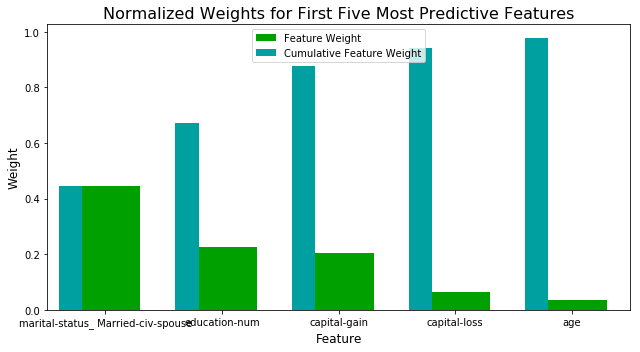

In [11]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = DecisionTreeClassifier(random_state=0, max_depth=6, min_samples_leaf=6, min_samples_split=10)
# model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), random_state=0, n_estimators=300, learning_rate=0.2)
model.fit(X_train, y_train)
# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_ 

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**
The features extracted are the same ones we were expecting to be important during the data exploratory analysis.<br>
In oarticular I was expecting marital status and education-num to be the most important ones, as out of the 11208 examples with income >50k, almost 10000 are married (more than 85%), and 10870 (more than 96%) have education level at least 9. The visualization confirms these two features as the most inportant ones.<br>
I calucated the same ratios for Occupation, but the examples are spread amongst more different values of this feature.
Similarly we saw that the mean Capital Gains among income <50k is 149.02 while among ones > 50k is 3991.79, and the 
mean Capital Losses among income <50k is 54.03 while among ones > 50k is 193.49. The visualization ranks them 3rd and fourth.<br>
Finally, Age is also important although the split is not as strong as in the features above: the mean of the age of the people in the income <=50K group is 36.749427 while among the >50K group it is 44.006067, so we expect older people to belong more likely to the >50k income group. I calculated the same statistics for the hours per week features and got 39.372023 in the <50k group and 45.690489 in the > 50K group so the difference between the two is a bit smaller.






### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [49]:
# Import functionality for cloning a model
from sklearn.base import clone
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer

#scorer = make_scorer(fbeta_score, beta=0.5) 

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Using best hyperparameters found with the Gridsearch
best_clf = AdaBoostClassifier(random_state=0, learning_rate=1, n_estimators=800)
start_full = time()
best_clf.fit(X_train, y_train)
end_full = time()
# Predictions on full model
start_pred_full = time()
best_predictions = best_clf.predict(X_test)
end_pred_full = time()

# Train on the "best" model found from grid search earlier
start_reduced = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end_reduced = time()
# Make new predictions
start_pred_reduced  = time()
reduced_predictions = clf.predict(X_test_reduced)
end_pred_reduced = time()

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}\n".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

print("Time elapsed to train full model: {}".format(end_full-start_full))
print("Time elapsed to train reduced model: {}".format(end_reduced-start_reduced))
print("Time elapsed to predict with the full model: {}".format(end_pred_full-start_pred_full))
print("Time elapsed to predict with the reduced model: {}".format(end_pred_reduced-start_pred_reduced))


Final Model trained on full data
------
Accuracy on testing data: 0.8669
F-score on testing data: 0.7442

Final Model trained on reduced data
------
Accuracy on testing data: 0.8584
F-score on testing data: 0.7338

Time elapsed to train full model: 25.040848970413208
Time elapsed to train reduced model: 8.390865087509155
Time elapsed to predict with the full model: 0.9278268814086914
Time elapsed to predict with the reduced model: 0.6537940502166748


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
Accuracy and F-score on the testing data with a "reduced" model trained only on the 5 features we extracted as most important gives are 0.08584 and 0.7338, slightly lower than the values obtained by training the model on the full dataset (0.8669 and 0.7442).<br>
I retrained the model here to compare the times. Training the full model took 25.04 secs while training the reduced model took 8.39 secs.<br>
Also the prediction times are 0.92 secs for the full model and 0.65 secs for the reduced one.<br>
We can consider a reduced model if training time is a factor however I don't find this difference in training time crucial also considering that I used my macbook cpu for training, so in a production environment with more resources available this time could be reduced dramatically. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.